# Description:

* calculations for modeling fragments in a CsCl gradient under non-equilibrium conditions

# Notes

* Good chapter on determining G+C content from CsCl gradient analysis
http://www.academia.edu/428160/Using_Analytical_Ultracentrifugation_of_DNA_in_CsCl_Gradients_to_Explore_Large-Scale_Properties_of_Genomes

http://www.analyticalultracentrifugation.com/dynamic_density_gradients.htm

Meselson et al. - 1957 - Equilibrium Sedimentation of Macromolecules in Den
Vinograd et al. - 1963 - Band-Centrifugation of Macromolecules and Viruses 

http://onlinelibrary.wiley.com.proxy.library.cornell.edu/doi/10.1002/bip.360101011/pdf


## Ultracentrigation book
http://books.google.com/books?hl=en&lr=&id=vxcSBQAAQBAJ&oi=fnd&pg=PA143&dq=Measurement+of+Density+Heterogeneity+by+Sedimentation+in&ots=l8ObYN-zVv&sig=Vcldf9_aqrJ-u7nQ1lBRKbknHps#v=onepage&q&f=false


## Forum info
* http://stackoverflow.com/questions/18624005/how-do-i-perform-a-convolution-in-python-with-a-variable-width-gaussian
* http://timstaley.co.uk/posts/convolving-pdfs-in-python/


## Possible workflows:
### KDE convolution
* KDE of fragment GC values
* bandwidth cross validation: https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
* convolution of KDE with diffusion function:
	* gaussian w/ mean of 0 and scale param = 44.5 (kb) / (mean fragment length)
		* http://www.academia.edu/428160/Using_Analytical_Ultracentrifugation_of_DNA_in_CsCl_Gradients_to_Explore_Large-Scale_Properties_of_Genomes
	* http://nbviewer.ipython.org/github/timstaley/ipython-notebooks/blob/compiled/probabilistic_programming/convolving_distributions_illustration.ipynb

##variable KDE 
* variable KDE of fragment GC values where kernel sigma is determined by mean fragment length
	* gaussian w/ scale param = 44.5 (kb) / fragment length



# Standard deviation of homogeneous DNA fragments

Vinograd et al., 1963; (band-centrifugation): 

\begin{align}
\sigma^2 = \frac{r_0}{r_0^0} \left\{ \frac{r_0}{r_0^0} + 2D \left( t - t^0 \right) \right\}
\end{align}

## Standard deviation of Gaussian band (assuming equilibrium), Meselson et al., 1957:

\begin{align}
\sigma^2 = -\sqrt{w} \\
w = \textrm{molecular weight}
\end{align}

## Standard deviation of Gaussian band at a given time, Meselson et al., 1957:

\begin{equation}
t^* = \frac{\sigma^2}{D} \left(ln \frac{L}{\sigma} + 1.26 \right), \quad L\gg\sigma \\
\sigma^2 = \textrm{stdev at equilibrium} \\
L = \textrm{length of column}
\end{equation}




* Gaussian within 1% of equillibrium value from center.
* ! assumes density gradient established at t = 0


### Alternative form:

\begin{align}
t = \frac{\beta^{\circ}(p_p - p_m)}{w^4 r_p^2 s} * \left(1.26 + ln \frac{r_b - r_t}{\sigma}\right)
\end{align}


\begin{equation}
t = \textrm{time in seconds} \\
\beta^{\circ} = \beta^{\circ} \textrm{ of salt forming the density gradient (CsCl = ?)} \\
p_p = \textrm{buoyant density of the the particle in the salt} \\
p_m = \textrm{density of the medium (at the given radius?)} \\
w = \textrm{angular velocity} \\
r_p = \textrm{distance (cm) of particle from from the axis of rotation} \\
s = \textrm{sedimentation rate } (S_{20,w} * 10^{-13}) \\
r_b = \textrm{distance to top of gradient} \\
r_t = \textrm{distance to bottom of gradient} \\
r_b - r_t = \textrm{length of gradient (L)}
\end{equation}


### Solving for sigma:

\begin{align}
\sigma = \frac{L}{e^{\left(\frac{w^4 r_p^2 s t}{\beta^{\circ}(p_p - p_m)} - 1.26\right)}}
\end{align}

# Variables specific to the Buckley lab setup

\begin{equation}
\omega = (2\pi \times \textrm{RPM}) /60, \quad \textrm{RPM} = 55000 \\
\beta^{\circ} = 1.14 \times 10^9 \\
r_b = 4.85 \\
r_t = 2.6 \\
L = r_b - r_t \\
s = S_{20,w} * 10^{-13} = 2.8 + 0.00834 * (l*666)^{0.479}, \quad \textrm{where l = length of fragment} \\
p_m = 1.7 \\
p_p = \textrm{buoyant density of the particle in CsCl} \\
r_p = ? \\
t = \textrm{independent variable}
\end{equation}


__isoconcentration point__

\begin{equation}
r_c = \sqrt{(r_t^2 + r_t * r_b + r_b^2)/3}
\end{equation}

__r<sub>p</sub> in relation to the particle's buoyant density (assuming equilibrium?)__

\begin{equation}
r_p = \sqrt{ ((p_p-p_m)*2*\frac{\beta^{\circ}}{w}) + r_c^2 } \\
p_p = \textrm{buoyant density}
\end{equation}

Maybe this should be drawn from a uniform distribution (particules distributed evenly across the gradient)???

__buoyant density of a DNA fragment in CsCl__

\begin{equation}
p_p = 0.098F + 1.66, \quad \textrm{where F = G+C molar fraction}
\end{equation}

__calculating gradient density at specific radius (to calculate p_m)__

??

__info needed on a DNA fragment to determine it's sigma of the Guassian distribution__

* fragment length
* fragment G+C

# Graphing the equations above

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mixture
#import sklearn.mixture as mixture

## Generating fragments

In [72]:
n_frags = 10000
frag_GC = np.random.normal(0.5,0.1,n_frags)
frag_GC[frag_GC < 0] = 0
frag_GC[frag_GC > 1] = 1
frag_len = np.random.normal(10000,1000,n_frags)

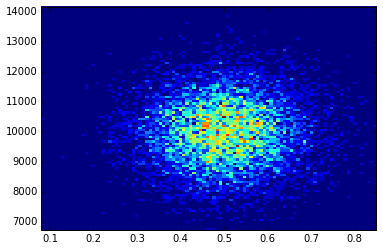

In [73]:
ret = plt.hist2d(frag_GC, frag_len, bins=100)

## Setting variables

In [89]:
RPM = 55000
omega = (2 * np.pi * RPM) / 60

beta_o = 1.14 * 10**9

radius_bottom = 4.85 
radius_top = 2.6 
col_len = radius_bottom - radius_top

density_medium = 1.7

## Calculation functions

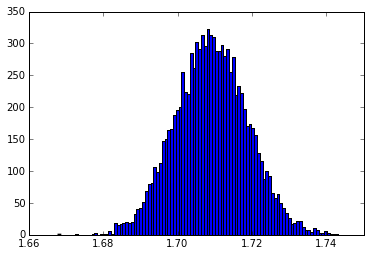

In [75]:
# BD from GC
frag_BD = 0.098 * frag_GC + 1.66

ret = plt.hist(frag_BD, bins=100)

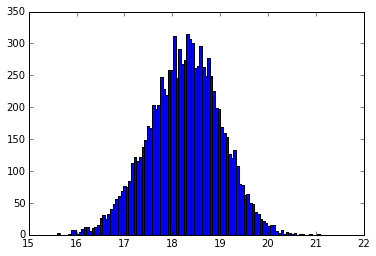

In [84]:
sedimentation = (frag_len*666)**0.479 * 0.00834 + 2.8   # l = length of fragment

ret = plt.hist(sedimentation, bins=100)

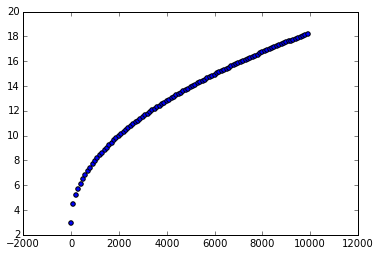

In [86]:
# sedimentation as a function of fragment length 
len_range = np.arange(1,10000, 100)

ret = plt.scatter(len_range, 2.8 + 0.00834 * (len_range*666)**0.479 )

In [113]:
# isoconcentration point
iso_point = sqrt((radius_top**2 + radius_top * radius_bottom + radius_bottom**2)/3)
iso_point

3.7812035121109258

In [101]:
# radius of particle

#radius_particle = np.sqrt( (frag_BD - density_medium)*2*(beta_o/omega) + iso_point**2 )


#ret = plt.hist(radius_particle)

array([ 62.83472857,  65.24947889,  71.07927139,  39.2627203 ,
        83.56106181,  60.12239077,  73.64807884,          nan,  91.27392451])

# Testing out speed of mixture models

In [95]:
n_dists = 10
n_samp = 10000

In [96]:
def make_mm(n_dists):
    dist_loc = np.random.uniform(0,1,n_dists)
    dist_scale = np.random.uniform(0,0.1, n_dists)
    dists = [mixture.NormalDistribution(x,y) for x,y in zip(dist_loc, dist_scale)]
    eq_weights = np.array([1.0 / n_dists] * n_dists)
    eq_weights[0] += 1.0 - np.sum(eq_weights)
    return mixture.MixtureModel(n_dists, eq_weights, dists)

In [97]:
mm = make_mm(n_dists)

In [98]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

10 loops, best of 3: 98.4 ms per loop


In [99]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

10 loops, best of 3: 65.4 ms per loop


In [100]:
n_dists = 1000
mm = make_mm(n_dists)

In [101]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

1 loops, best of 3: 1.7 s per loop


In [102]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

1 loops, best of 3: 1.64 s per loop


In [103]:
n_dists = 10000
mm = make_mm(n_dists)

In [104]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

1 loops, best of 3: 17 s per loop


In [105]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

1 loops, best of 3: 16.7 s per loop


In [106]:
n_samp = 100000

In [107]:
%%timeit
smp = mm.sampleDataSet(n_samp).getInternalFeature(0).flatten()

1 loops, best of 3: 2min 51s per loop


In [108]:
%%timeit
smp = np.array([mm.sample() for i in arange(n_samp)])

1 loops, best of 3: 2min 46s per loop


__Notes:__

* a mixture model with many distributions (>1000) is very slow for sampling

In [109]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(y, x, bins=100)

In [110]:
H

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

***
***

# Workflow for modeling DNA fragment locations in a gradient

For each genome in mock community, simulate N fragments and calculate their Guassian distributions in the gradient.
Create a mixture model of those Guassian distributions to sample A<sub>a</sub> fragments,
where A<sub>a</sub> = the absolute abundance of the taxon in the mock community.
One mixture model per genome.

## User defined:

* Rotor specs
* cfg parameters (RPM, time)

## Generate fragment density distributions

* For each genome in the mock community:
  * Simulate fragments
  * Calculate sigma of Gaussian density distribution
  * Create mixture model from all Gaussians of the fragments
  
## Simulate fraction communities

* For each genome in mock community:
  * sample fragments from mixture model based on total abundance of taxon in mock community
  * bin fragments into gradient fractions